In [1]:
import numpy as np
import pandas as pd
import matplotlib as mol
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import keras.utils.np_utils as ku

In [4]:
from keras.datasets import fashion_mnist

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
print(train_images[0].shape)

(28, 28)


In [8]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

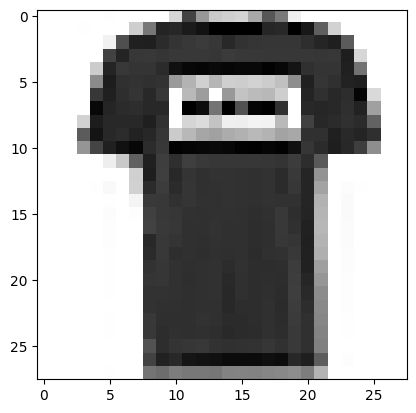

In [9]:
plt.imshow(train_images[1],cmap=plt.cm.binary)
plt.show()

In [10]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [11]:
#Data reshaping to 4d #1 for chamodelel, 3d array ie height weight chamodelel 
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [12]:
train_images.shape

(60000, 28, 28, 1)

In [13]:
#Creating lables
y_label = test_labels.copy()

### Data Normilazing

In [14]:
# pixel values are between 0 to 255
train_images_n = train_images.astype('float32')/255 
test_images_n = test_images.astype('float32')/255
print(train_images_n.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [15]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [16]:
print(train_labels.dtype)

uint8


In [17]:
train_labels = ku.to_categorical(train_labels)
print(train_labels[5:10,])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [18]:
test_labels = ku.to_categorical(test_labels)
print(test_labels)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Split data to train/validation/test sets

In [19]:
X_valid, X_train = train_images_n[:5000],train_images_n[5000:]
y_valid,y_train = train_labels[:5000], train_labels[5000:]
X_test = test_images_n 

In [20]:
### Creating Model Architecture
np.random.seed(45)
tf.random.set_seed(45)

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation='sigmoid'))
model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model_history = model.fit(train_images, train_labels, epochs = 50, batch_size = 128)

Epoch 1/50
469/469 [==============================] - 7s 7ms/step - loss: 0.7155 - accuracy: 0.7306
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.5733 - accuracy: 0.7839
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.5337 - accuracy: 0.8005
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.5093 - accuracy: 0.8121
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.4878 - accuracy: 0.8229
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.4791 - accuracy: 0.8242
Epoch 7/50
469/469 [==============================] - 5s 11ms/step - loss: 0.4684 - accuracy: 0.8284
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4619 - accuracy: 0.8315
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.4563 - accuracy: 0.8338
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.4499 - accuracy: 0.834

In [24]:
model_history.history

{'loss': [0.7123091220855713,
  0.5704681873321533,
  0.5398558974266052,
  0.5093451142311096,
  0.5000022649765015,
  0.4827222228050232,
  0.47303810715675354,
  0.4574669301509857,
  0.45726442337036133,
  0.4504869878292084,
  0.44566187262535095,
  0.43924152851104736,
  0.4390326738357544,
  0.4382217228412628,
  0.4365714490413666,
  0.4310164749622345,
  0.42952409386634827,
  0.43120691180229187,
  0.42335712909698486,
  0.4236019551753998,
  0.4293223023414612,
  0.4193176329135895,
  0.42053958773612976,
  0.4138781428337097,
  0.41409435868263245,
  0.4123118221759796,
  0.4141530692577362,
  0.4097115099430084,
  0.41069895029067993,
  0.40745821595191956,
  0.4093601703643799,
  0.4135601222515106,
  0.402653306722641,
  0.40210556983947754,
  0.39629417657852173,
  0.39780253171920776,
  0.3962479531764984,
  0.3952800929546356,
  0.39745280146598816,
  0.39408665895462036,
  0.3961133658885956,
  0.3914991319179535,
  0.3906610906124115,
  0.3948419690132141,
  0.38890

In [25]:
ev = model.evaluate(test_images_n,test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.4621 - accuracy: 0.8380


In [26]:
ev

[0.4621078670024872, 0.8379999995231628]

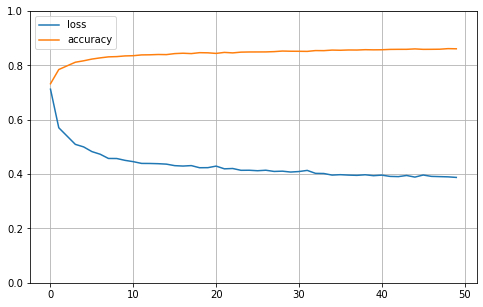

In [27]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
X_new = test_images[:3]

In [29]:
y_pred = model.predict(X_new)
y_pred

classes_x=np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 220ms/step


#### class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [30]:
test_labels[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

AxesImage(54,36;334.8x217.44)


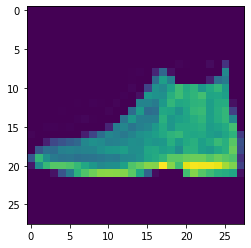

In [31]:
print(plt.imshow(test_images[0].reshape((28,28))))

AxesImage(54,36;334.8x217.44)


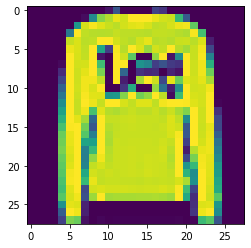

In [32]:
print(plt.imshow(test_images[1].reshape((28,28))))

In [ ]:
keras.backend.clear_session

In [ ]:
del model